In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import netCDF4
import matplotlib.patches as mpatches
from scipy import stats
import matplotlib.gridspec as gridspec

%matplotlib inline

In [8]:
# for easy setup of subplots
def newSP(y,x):
    global __spv, __spi ; __spv = (y,x) ; __spi = 1 ; plt.subplot(__spv[0], __spv[1], __spi)
def nextSP():
    global __spv, __spi ; __spi = __spi + 1 ; plt.subplot(__spv[0], __spv[1], __spi)
    

In [9]:
sns.set_style('white')
sns.set_context('paper', font_scale=4)
sns.set_palette('hls', 4)
sns.set_style('ticks')

In [17]:
dirname = '/work/Carolina.Dufour/diagnostics/comp_model2model/OM4/MOC'
convert = 1e-9

fieldA = np.load(dirname+'/OM4p25_y1888-2007_max_moc_upper_cell_so.npy')
fieldA = np.squeeze(fieldA,axis=0)
OM4p25_moc = fieldA[60:120]*convert
print(OM4p25_moc.shape)

fieldB = np.load(dirname+'/OM4p25_y1888-2007_max_zonal_wind_so.npy')
fieldB = np.squeeze(fieldB,axis=0)
OM4p25_tau = fieldB
print(OM4p25_tau.shape)

fieldC = np.load(dirname+'/OM4p5_y1948-2007_max_moc_upper_cell_so.npy')
fieldC = np.squeeze(fieldC,axis=0)
OM4p5_moc = fieldC*convert
print(OM4p5_moc.shape)

fieldD = np.load(dirname+'/OM4p5_y1948-2007_max_zonal_wind_so.npy')
fieldD = np.squeeze(fieldD,axis=0)
OM4p5_tau = fieldD
print(OM4p5_tau.shape)

(60,)
(60,)
(60,)
(60,)


In [18]:
# linear regression fits for 5th cycle over years 1958-2007 for p25 and p5 
yrstart = 10    # to start at 1958

X    = np.arange(1.0,61.0)
year = X + 1948
print(X[yrstart:60].shape)

Yp5 = OM4p5_moc[yrstart:60] - np.mean(OM4p5_moc[yrstart:60])
#slope_p5, intercept_p5, r_value_p5, p_value_p5, std_err=stats.linregress(X[yrstart:60],OM4p5_moc[yrstart:60])
slope_p5, intercept_p5, r_value_p5, p_value_p5, std_err=stats.linregress(X[yrstart:60],Yp5)
p5_fit  = X * slope_p5  + intercept_p5

sp5 = format(slope_p5, '.3f')
ip5 = format(intercept_p5, '.3f')
rp5 = format(r_value_p5, '.3f')
pp5 = format(p_value_p5, '.5f')
print('for OM4_p5: slope,intercept,r_value,p_value = ',sp5,ip5,rp5,pp5)

Yp25 = OM4p25_moc[yrstart:60] - np.mean(OM4p25_moc[yrstart:60])
#slope_p25, intercept_p25, r_value_p25, p_value_p25, std_err=stats.linregress(X[yrstart:60],OM4p25_moc[yrstart:60])
slope_p25, intercept_p25, r_value_p25, p_value_p25, std_err=stats.linregress(X[yrstart:60],Yp25)
p25_fit  = X * slope_p25  + intercept_p25

sp25 = format(slope_p25, '.3f')
ip25 = format(intercept_p25, '.3f')
rp25 = format(r_value_p25, '.3f')
pp25 = format(p_value_p25, '.5f')
print('for OM4_p25: slope,intercept,r_value,p_value = ',sp25,ip25,rp25,pp25)



(50,)
for OM4_p5: slope,intercept,r_value,p_value =  0.136 -4.827 0.761 0.00000
for OM4_p25: slope,intercept,r_value,p_value =  0.073 -2.598 0.467 0.00063


<Figure size 720x360 with 0 Axes>

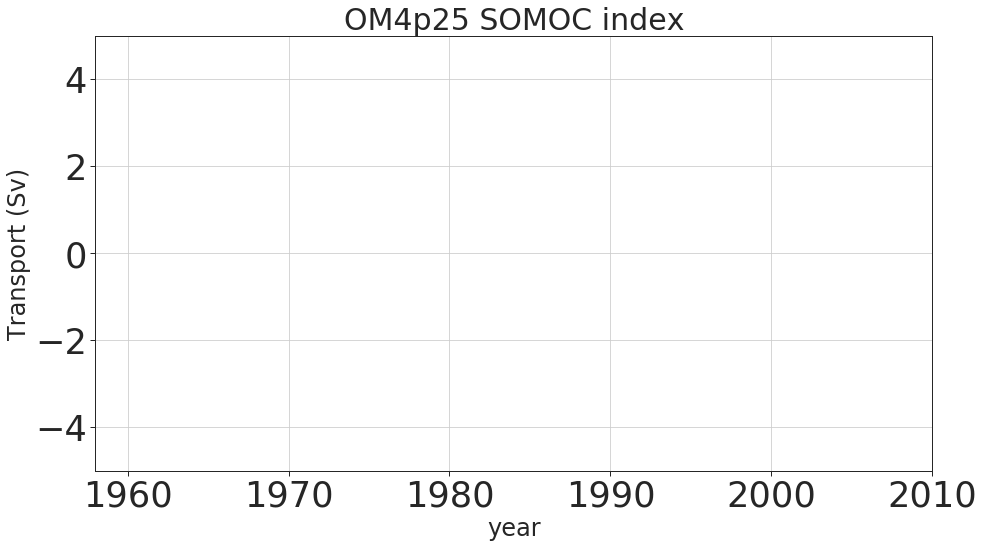

In [19]:
plt.figure(figsize=(10, 5)) 
fig, axis = plt.subplots(1,1, figsize=(15,8))
ymin=-5
ymax= 5

#plt.plot(year,OM4p25_moc,linewidth=1,color='black')
plt.plot(year[yrstart:60],Yp25,linewidth=4,color='green')
plt.plot(year,p25_fit,linewidth=4,color='red')
plt.title('OM4p25 SOMOC index',fontsize=30)
plt.ylabel('Transport (Sv)',fontsize=24)
plt.xlabel('year',fontsize=24)
plt.grid()
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])
    

fig.savefig('./figures/OM4p25_SOMOC.png', bbox_inches='tight', dpi=200)



<Figure size 720x360 with 0 Axes>

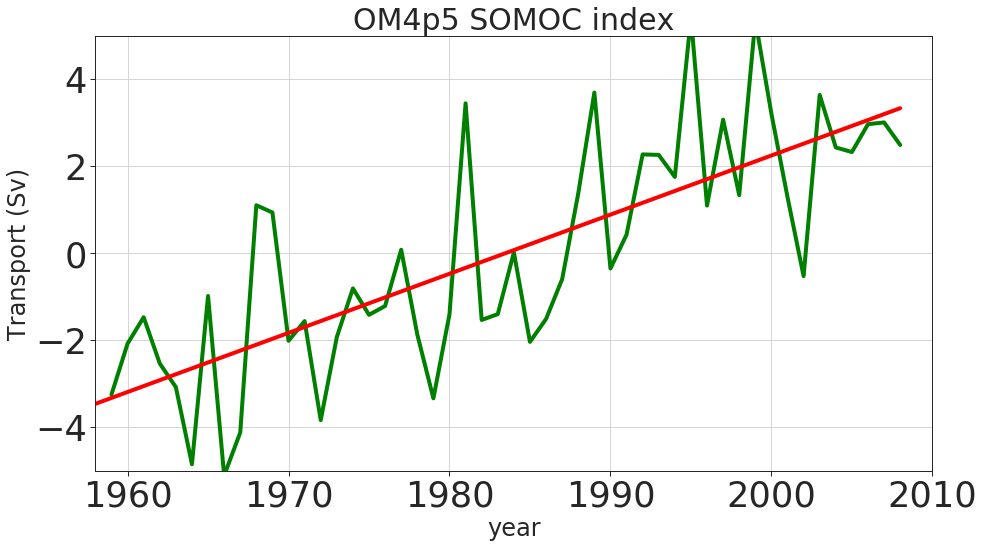

In [13]:
plt.figure(figsize=(10, 5)) 
plt.subplots(1,1, figsize=(15,8))
ymin=-5
ymax= 5

#plt.plot(year,OM4p5_moc,linewidth=1,color='black')
plt.plot(year[yrstart:60],Yp5,linewidth=4,color='green')
plt.plot(year,p5_fit,linewidth=4,color='red')
plt.title('OM4p5 SOMOC index',fontsize=30)
plt.ylabel('Transport (Sv)',fontsize=24)
plt.xlabel('year',fontsize=24)
plt.grid()
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])


fig.savefig('./figures/OM4p5_SOMOC.png', bbox_inches='tight', dpi=200)



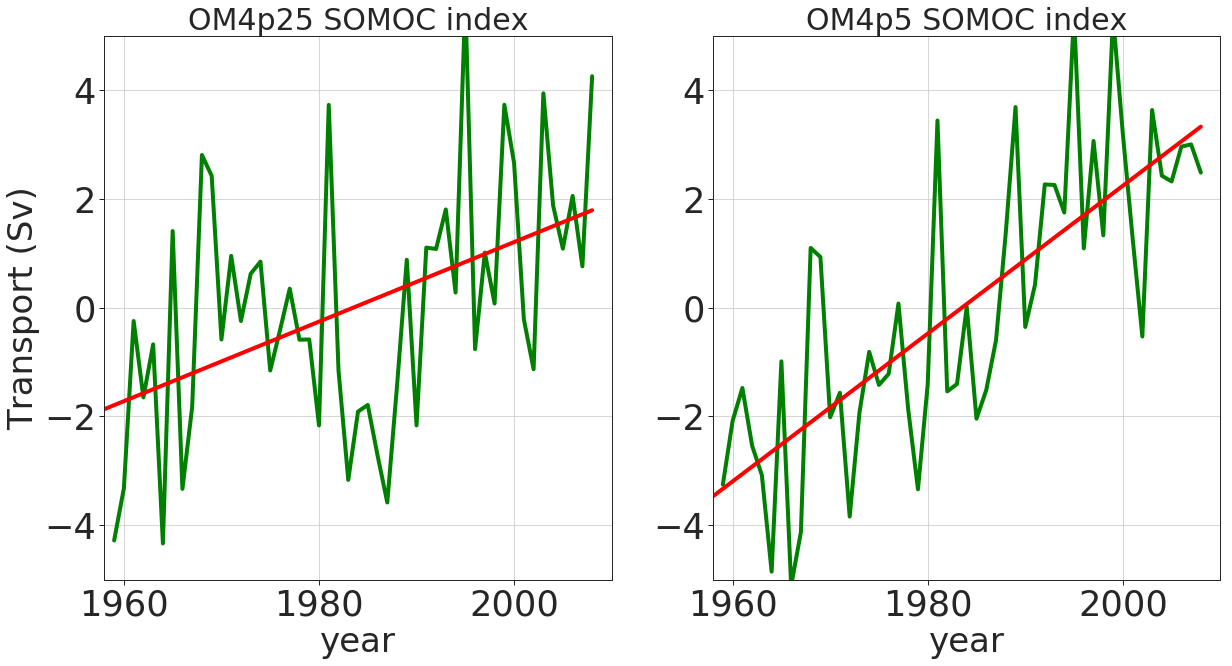

In [14]:
plt.figure(figsize=(20,10))
ymin=-5
ymax= 5

#fig.subplots_adjust(hspace=-1.0)
plt.subplot(1,2,1)
plt.plot(year[yrstart:60],Yp25,linewidth=4,color='green')
plt.plot(year,p25_fit,linewidth=4,color='red')
plt.title('OM4p25 SOMOC index',fontsize=30)
#plt.ylabel('Transport (Sv)',fontsize=34)
plt.xlabel('year',fontsize=34)
plt.grid()
plt.ylabel('Transport (Sv)',fontsize=34)
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])

plt.subplot(1,2,2)
plt.plot(year[yrstart:60],Yp5,linewidth=4,color='green')
plt.plot(year,p5_fit,linewidth=4,color='red')
plt.title('OM4p5 SOMOC index',fontsize=30)
#plt.ylabel('Transport (Sv)',fontsize=34)
plt.xlabel('year',fontsize=34)
plt.grid()
#plt.ylabel('Transport (Sv)',fontsize=34)
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])

plt.savefig('./figures/OM4p5_OM4p25_SOMOC.png', bbox_inches='tight', dpi=200)
plt.show()

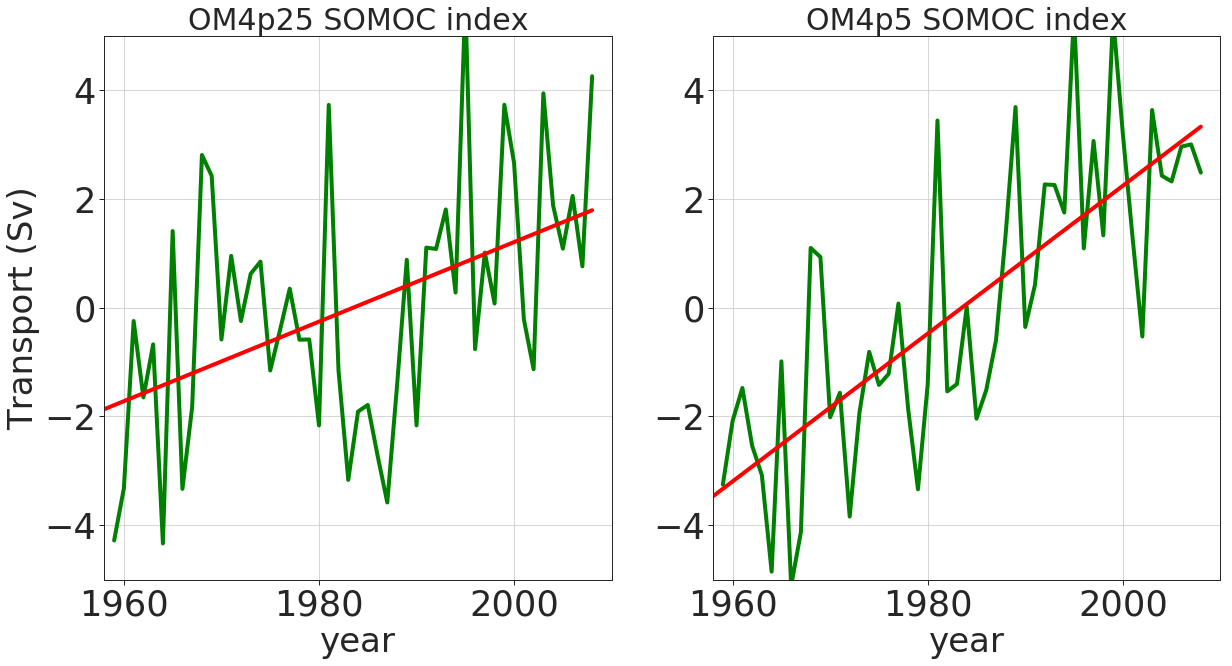

In [15]:
plt.figure(figsize=(20,10))
newSP(2,1)

ymin=-5
ymax= 5

#fig.subplots_adjust(hspace=-1.0)

plt.subplot(121);
#plt.plot(year,OM4p25_moc,linewidth=1,color='black')
plt.plot(year[yrstart:60],Yp25,linewidth=4,color='green')
plt.plot(year,p25_fit,linewidth=4,color='red')
plt.title('OM4p25 SOMOC index',fontsize=30)
#plt.ylabel('Transport (Sv)',fontsize=34)
plt.xlabel('year',fontsize=34)
plt.grid()
plt.ylabel('Transport (Sv)',fontsize=34)
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])
    
plt.subplot(122);
plt.plot(year[yrstart:60],Yp5,linewidth=4,color='green')
plt.plot(year,p5_fit,linewidth=4,color='red')
plt.title('OM4p5 SOMOC index',fontsize=30)
plt.xlabel('year',fontsize=34)
plt.grid()
plt.ylim([ymin, ymax])
plt.xlim([1958,2010])
  

plt.show()